## Mitsiu Alejandro Carreño Sarabia - E23S-18014

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0


## 1. 
Convierta la variable gender en binaria

In [3]:
df["gender"].value_counts()


Female    58547
Male      41429
Other        18
Name: gender, dtype: int64

In [4]:
#df = pd.get_dummies(df, columns=["gender"], drop_first=True, dtype="int")

gender_code = {
    'Female': 1,
    'Male': 2,
    'Other': 3
}

df['gender'] = df['gender'].replace(gender_code)


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df["gender"].value_counts()

1    58547
2    41429
3       18
Name: gender, dtype: int64

## 2. 
Grafique un correlation heatmap1 para ver cómo se relacionan las variables utilizando la
librería Seaborn. ¿Qué variables a primera vista explican mejor la diabetes?

<ipython-input-7-d330f33a9655>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-7-d330f33a9655>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Blues')


<Axes: >

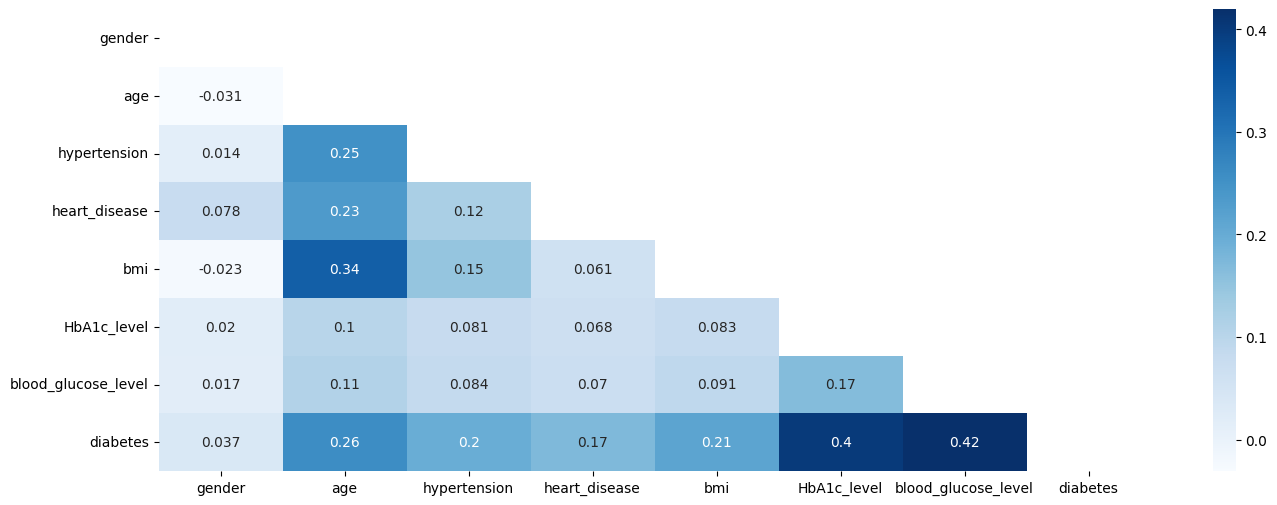

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Blues')

### Conclusión
Las variables que más se relacionan con la diabetes son blood_glucose_level y HbA1c_level

## 3. 
A continuación, entrene 2 modelos usando solo las 2 variables que más se
correlacionaron con la diabetes, uno de regresión logística y uno de árboles de decisión
(Training set 80% en ambos casos, profundidad=2 para el árbol, y random_state=0 en
ambos casos, escriba estos modelos en celdas distintas y añada títulos de cuál modelo se
entrenará). De acuerdo al accuracy score, cuál modelo fue mejor en el devset?

In [9]:
x = df[["blood_glucose_level", "HbA1c_level"]]
y = df[["diabetes"]]
print(x.shape, y.shape)

(99994, 2) (99994, 1)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Train", x_train.shape, y_train.shape)
print("Test", x_test.shape, y_test.shape)

Train (79995, 2) (79995, 1)
Test (19999, 2) (19999, 1)


### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.6, 0.8333333333333334, 'HbA1c_level <= 6.7\ngini = 0.155\nsamples = 79995\nvalue = [73243, 6752]\nclass = 0'),
 Text(0.4, 0.5, 'blood_glucose_level <= 210.0\ngini = 0.091\nsamples = 76899\nvalue = [73243, 3656]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.058\nsamples = 75481\nvalue = [73243, 2238]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1418\nvalue = [0, 1418]\nclass = 1'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3096\nvalue = [0, 3096]\nclass = 1')]

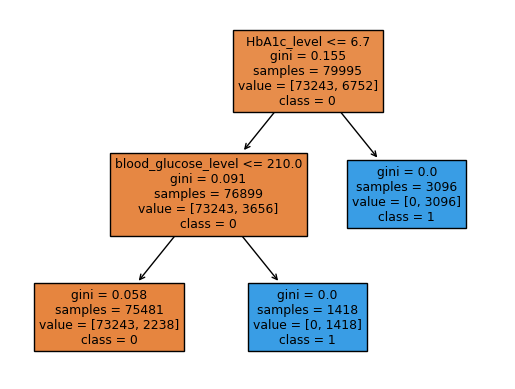

In [13]:
from sklearn.tree import plot_tree

plot_tree(dtc, feature_names=x.columns, class_names=[str(x) for x in dtc.classes_], filled=True)

In [14]:
y_train_pred_tree = dtc.predict(x_train)
y_test_pred_tree = dtc.predict(x_test)

from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("Tree acc in train", train_accuracy_tree)
print("Tree acc in test", test_accuracy_tree)

Tree acc in train 0.9720232514532158
Tree acc in test 0.9712485624281214


### Logistic Regression

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lreg = LogisticRegression(random_state=0)
lreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [16]:
y_train_pred_lreg = lreg.predict(x_train)
y_test_pred_lreg = lreg.predict(x_test)

train_accuracy_lreg = accuracy_score(y_train, y_train_pred_lreg)
test_accuracy_lreg = accuracy_score(y_test, y_test_pred_lreg)

print("Lreg acc in train", train_accuracy_lreg)
print("Lreg acc in test", test_accuracy_lreg)

Lreg acc in train 0.9549221826364148
Lreg acc in test 0.9538976948847442


### Conclusión
El modelo de árbol de decisión tuvo mejor accuracy_score tanto en el set de entrenamiento como en el de testing


## 4. 
¿Cuántos falsos positivos y falsos negativos hubo para cada modelo (usar la matriz de
confusión)?

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Decision Tree

<Figure size 1600x600 with 0 Axes>

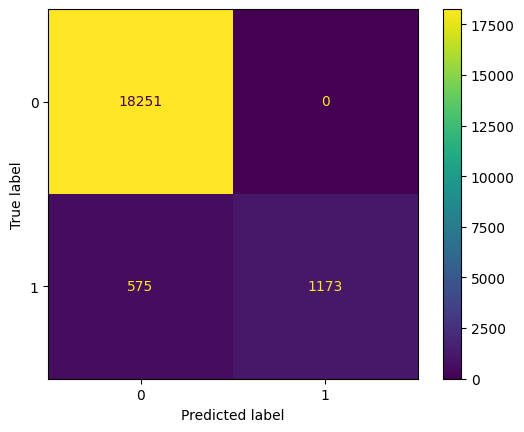

In [18]:
fig = plt.figure(figsize=(16,6))
conf_m_tree = confusion_matrix(y_test, y_test_pred_tree, labels=dtc.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix= conf_m_tree, display_labels = dtc.classes_)

disp_tree.plot()
fig.show()

### Logistic Regression

<Figure size 1600x600 with 0 Axes>

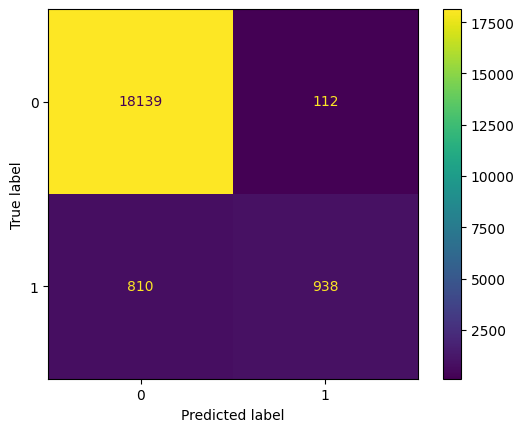

In [20]:
fig = plt.figure(figsize=(16,6))
conf_m_lreg = confusion_matrix(y_test, y_test_pred_lreg, labels=lreg.classes_)
disp_lreg = ConfusionMatrixDisplay(confusion_matrix = conf_m_lreg, display_labels = lreg.classes_)

disp_lreg.plot()
fig.show()

### Conlusión
El árbol de decisión tuvo 575 falsos negativos y 0 falsos positivos.     
La regresión logística tuvo 810 falsos negativos y 112 falsos positivos.      
En general ambos modelos tienen área de mejora ya que al tratarse de salud, se deben minimizar los falsos negativos, a costa de incrementar los falsos positivos
 

## 5. 
Llegaron nuevos pacientes (base Nuevos_pacientes) determine si tienen o no Diabetes?

In [21]:
df_nuevos = pd.read_excel("Nuevos_pacientes.xlsx")
df_nuevos

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,36,0,0,No Info,24.60,4.8,145
1,Female,80,0,0,No Info,27.32,6.2,90
2,Female,2,0,0,No Info,17.37,6.5,100
3,Male,66,0,0,former,27.83,5.7,155
4,Female,24,0,0,never,35.42,4.0,100
5,Female,57,0,0,current,22.43,6.6,90


In [27]:
x_nuevos = df_nuevos[["blood_glucose_level", "HbA1c_level"]]

y_pred_nuevos = dtc.predict(x_nuevos)

y_pred_nuevos

array([0, 0, 0, 0, 0, 0])

## Conclusión
De los nuevos pacientes ninguno tiene diabetes (evaluado con el modelo de árbol de decisión) lo cual hace sentido porque comparando con el árbol ploteado, ninguno tiene más de 6.7 en HbA1c_level ni más de 210 en blood_glucose_level que son las condiciones del modelo para predecir diabetes positivo

## Challenge (opcional):
En el drive están la incidencia delictiva para los estados de México. Haga una gráfica dónde
x= años y Y=íncidencia delictiva. Debe haber tres líneas, el estado con menor índice
delictivo (para escoger el mínimo utilice el año 2010), el estado con mayoríndice delictivo
(referencia el año 2010) y l promedio durante los años disponibles.

In [42]:
df_del = pd.read_excel("incidencia_00.xlsx")
df_del = df_del["cve_entidad id_indicador indicador 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021".split()]
df_del

,cve_entidad,id_indicador,indicador,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,6200002201,Porcentaje de unidades económicas víctimas del...,NaN,37.365920,NaN,33.634243,NaN,35.484960,NaN,33.732887,NaN,30.462028,NaN,24.629802
1,0,6200002231,Cifra negra de delitos en unidades económicas,NaN,88.122608,NaN,88.054676,NaN,90.347165,NaN,86.562996,NaN,92.016873,NaN,91.541154
2,0,6200002234,Porcentaje de delitos con portación de armas e...,NaN,45.480340,NaN,45.301208,NaN,34.728797,NaN,47.683472,NaN,31.042686,NaN,33.581976
3,0,6200005814,Porcentaje de delitos con portación de armas e...,40.674462,48.445682,44.142811,50.225366,48.577923,45.212453,43.060500,44.210583,NaN,42.850759,41.550866,38.087719
4,0,6200005821,Cifra Negra (delitos no denunciados y los deli...,91.985651,91.619014,92.091139,93.803162,92.789076,93.714687,93.648470,93.237094,NaN,92.392142,93.269372,93.212103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,32,6200028526,Tasa de incidencia delictiva por cada cien mil...,29688.079823,18772.266929,20505.980378,27290.453211,30057.593796,21500.939984,24159.811536,34642.119961,26670.441465,22362.673286,21510.494620,22473.562000
491,32,6200028528,Tasa de concentración de delitos ocurridos,NaN,2.212513,NaN,1.741245,NaN,2.787648,NaN,2.034482,NaN,2.670863,NaN,2.529970
492,32,6200324150,Delitos denunciados ante el Ministerio Público...,NaN,453.679760,NaN,876.153310,NaN,1201.167560,NaN,1088.555152,NaN,1179.758811,NaN,145.471800
493,32,6200324151,Delitos no denunciados o en los que no se espe...,NaN,20924.133300,NaN,18762.765570,NaN,40310.044575,NaN,38314.136780,NaN,38437.518781,NaN,41880.905000


In [43]:
df_del["indicador"].value_counts()

Porcentaje de unidades económicas víctimas del delito                                                                                                                                  33
Delitos denunciados ante el Ministerio Público, a partir de los cuales no se inició averiguación previa o no se especifica si se inició averiguación previa                            33
Delitos no denunciados o en los que no se especifica si se denunció ante el Ministerio Público (en unidades económicas)                                                                33
Delitos denunciados ante el Ministerio Público a partir de los cuales no se inició averiguación previa o no se especifica si se inició averiguación previa (en unidades económicas)    33
Tasa de concentración de delitos ocurridos                                                                                                                                             33
Cifra negra de delitos en unidades económicas                         

In [44]:
df_del.query("indicador == 'Tasa de incidencia delictiva por cada cien mil habitantes'")["id_indicador"]

22     6200028526
56     6200028526
70     6200028526
84     6200028526
98     6200028526
112    6200028526
126    6200028526
140    6200028526
154    6200028526
168    6200028526
182    6200028526
196    6200028526
210    6200028526
224    6200028526
238    6200028526
252    6200028526
266    6200028526
280    6200028526
294    6200028526
308    6200028526
322    6200028526
336    6200028526
350    6200028526
364    6200028526
378    6200028526
392    6200028526
406    6200028526
420    6200028526
434    6200028526
448    6200028526
462    6200028526
476    6200028526
490    6200028526
Name: id_indicador, dtype: int64

In [46]:
df_del = df_del.query("id_indicador == 6200028526 and cve_entidad != 0")
df_del.head()

,cve_entidad,id_indicador,indicador,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
56,1,6200028526,Tasa de incidencia delictiva por cada cien mil...,56089.298817,25510.617660,32367.894100,24710.672618,39453.491635,35457.010529,41254.089901,39912.102305,36499.565620,48442.574432,29984.440852,29583.507682
70,2,6200028526,Tasa de incidencia delictiva por cada cien mil...,31791.212257,29445.833407,39296.731904,57066.465356,56632.113409,32758.264147,51285.655754,43921.170391,42724.931695,35654.798838,27377.163978,31689.847974
84,3,6200028526,Tasa de incidencia delictiva por cada cien mil...,25778.758621,28884.056404,31048.870228,23747.355551,34699.971367,25576.664406,29939.140120,25689.635950,28376.687697,18887.187259,22739.141527,21755.810019
98,4,6200028526,Tasa de incidencia delictiva por cada cien mil...,20922.465605,21703.811998,29097.319960,30597.470650,29306.283667,22113.816178,28892.347080,28283.423371,26466.120313,18595.470995,25389.601413,18609.669477
112,5,6200028526,Tasa de incidencia delictiva por cada cien mil...,29278.656420,26558.083130,17870.371650,25451.362173,18317.757300,24800.215823,25214.972639,25298.669397,24813.098347,21895.714605,26383.374493,24418.092224


In [48]:
df_del.drop(columns=["id_indicador", "indicador"], inplace=True)
df_del

<ipython-input-48-b7f551da002b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_del.drop(columns=["id_indicador", "indicador"], inplace=True)


,cve_entidad,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
56,1,56089.298817,25510.617660,32367.894100,24710.672618,39453.491635,35457.010529,41254.089901,39912.102305,36499.565620,48442.574432,29984.440852,29583.507682
70,2,31791.212257,29445.833407,39296.731904,57066.465356,56632.113409,32758.264147,51285.655754,43921.170391,42724.931695,35654.798838,27377.163978,31689.847974
84,3,25778.758621,28884.056404,31048.870228,23747.355551,34699.971367,25576.664406,29939.140120,25689.635950,28376.687697,18887.187259,22739.141527,21755.810019
98,4,20922.465605,21703.811998,29097.319960,30597.470650,29306.283667,22113.816178,28892.347080,28283.423371,26466.120313,18595.470995,25389.601413,18609.669477
112,5,29278.656420,26558.083130,17870.371650,25451.362173,18317.757300,24800.215823,25214.972639,25298.669397,24813.098347,21895.714605,26383.374493,24418.092224
126,6,17342.802756,22287.247372,25168.639613,26309.137977,30534.990216,27044.733866,29449.171708,27074.467883,28375.593112,29280.338497,26792.821052,26564.671379
140,7,15027.606242,13663.481400,12826.927232,19215.039266,19159.748447,16687.344642,20055.205625,20464.080303,19409.426503,13902.777903,15689.174732,16385.996584
154,8,41902.604709,30562.038723,35951.575911,31669.051934,24294.587075,31273.886785,34919.671640,28857.432730,28621.933516,23132.589235,25689.989119,26431.717400
168,9,44054.992530,40790.477482,49198.216278,51786.459107,59544.946751,52717.760911,49912.555784,68954.308826,69715.896529,62008.232455,53334.414276,45336.034859
182,10,23802.966002,21540.465808,27630.864731,22512.280104,30080.403168,25640.035137,23282.615667,22565.896545,22586.474536,21373.437999,22969.799184,17386.977369


In [60]:
## Obtener máx, min y promedio
df_del_min = df_del[df_del['2010']==df_del['2010'].min()]
df_del_max = df_del[df_del['2010']==df_del['2010'].max()]


In [49]:
# El dataset esta en formato wide, donde cada año tiene una columna, 
# prefiero intercambiar los años en una sola columna (transponer la tabla)
df_melt = pd.melt(df_.reset_index(), id_vars=["index"], var_name="year")
df_melt = df_melt.drop(columns=["index"])
df_melt

,year,value
0,cve_entidad,1.000000
1,cve_entidad,2.000000
2,cve_entidad,3.000000
3,cve_entidad,4.000000
4,cve_entidad,5.000000
...,...,...
411,2021,20473.064259
412,2021,28717.768130
413,2021,19544.721556
414,2021,23599.863295


In [ ]:
# Gráficar